In [13]:
from s04utils.modules.load.Timestamps import Timestamps
from s04utils.modules.load.BinnedTimestamps import BinnedTimestamps
from s04utils.modules.analyze import HMM_analysis as hmma

from bokeh.plotting import figure, show, output_notebook, curdoc
from matplotlib_inline.backend_inline import set_matplotlib_formats

import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import os
import glob


from sfHMM import sfHMM1
from sfHMM.gmm import GMMs


In [14]:
# Set quality for plt plots
set_matplotlib_formats('retina')

# Set output style for bokeh plots
#curdoc().theme = 'dark_minimal'
output_notebook()

Loading BokehJS ...

In [15]:
#SOURCE_PATH = '/Users/kappel/Messungen/Setup04/JaKa/post_hack/23_08_29/77K-33nM-eGFP-vitrified/05uW/timestamps/tt_eGFP_33nm_NaP_100mM_ph7dot5_Treh7dot5_05uW_77K_circpol_014.h5'
#SOURCE_PATH = '/Users/kappel/Experimental-Data/23_10_12_state_analysis/raw/23_08_29/77K-33nM-eGFP-vitrified/05uW/tt_eGFP_33nM_NaP_100mM_ph7dot5_Treh7dot5_05uW_77K_circpol_012.h5'

In [16]:
SOURCE_PATH = '/Users/kappel/Messungen/Setup04/JaKa/post_hack/23_08_29/77K-33nM-eGFP-vitrified/10uW/timestamps/tt_eGFP_33nM_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_031.h5'

In [17]:
# Load timestamps from file
ts_binned = BinnedTimestamps(path=SOURCE_PATH, bin_width=0.01)

In [18]:
hmma.create_bokeh_plot(ts_binned)

In [19]:
cutoff_pos, viterbi_steps = hmma.find_last_steps(ts_binned)
print(hmma.find_cutoffset(viterbi_steps))

Detector: detector_0
Unique: [ 32.05916473 126.58146747]
Counts: [1127  370]

Detector: detector_0
Unique: [0. 1.]
Counts: [1127  370]

---------------------------------
Detector: detector_1
Unique: [22.83674494 28.73082163]
Counts: [4279 3136]

Detector: detector_1
Unique: [0. 1.]
Counts: [4279 3136]

---------------------------------
Detector: detector_sum
Unique: [ 57.17601031 180.78446468]
Counts: [1216  281]

Detector: detector_sum
Unique: [0. 1.]
Counts: [1216  281]

---------------------------------
{'detector_0': 10, 'detector_1': 10, 'detector_sum': 10}


In [20]:
# Iterate over detectors in binned timestamps
for detector in ts_binned.as_dataframe.columns:
    gmms = GMMs(ts_binned.as_dataframe[detector][0:cutoff_pos[detector]], krange=(2, 6))
    gmms.fit()
    #gmms.show_aic_bic()
    #gmms.plot_all()
    gmms_opt_n = gmms.get_optimal(criterion="bic").n_components
    sf = sfHMM1(ts_binned.as_dataframe[detector][0:cutoff_pos[detector]], krange=(2, gmms_opt_n), model='p', name=detector).run_all(plot=False)
    hmma.plot_viterbi(ts_binned, sf)

In [21]:
'''# Iterate over detectors in binned timestamps
gmms = GMMs(ts_binned.as_dataframe['detector_0'][0:cutoff_pos['detector_0']], krange=(2, 6))
gmms.fit()
#gmms.show_aic_bic()
#gmms.plot_all()
gmms_opt_n = gmms.get_optimal(criterion="bic").n_components
print(gmms_opt_n)
sf = sfHMM1(ts_binned.as_dataframe['detector_0'][0:cutoff_pos['detector_0']], krange=(2, gmms_opt_n), model='p').run_all()


hmma.plot_viterbi(ts_binned, sf)'''

'# Iterate over detectors in binned timestamps\ngmms = GMMs(ts_binned.as_dataframe[\'detector_0\'][0:cutoff_pos[\'detector_0\']], krange=(2, 6))\ngmms.fit()\n#gmms.show_aic_bic()\n#gmms.plot_all()\ngmms_opt_n = gmms.get_optimal(criterion="bic").n_components\nprint(gmms_opt_n)\nsf = sfHMM1(ts_binned.as_dataframe[\'detector_0\'][0:cutoff_pos[\'detector_0\']], krange=(2, gmms_opt_n), model=\'p\').run_all()\n\n\nhmma.plot_viterbi(ts_binned, sf)'

# Multi analysis

In [22]:
# set source path
SOURCE_PATH = '/Users/kappel/Experimental-Data/23_10_12_state_analysis/raw/23_08_29/77K-33nM-eGFP-vitrified/10uW'

# get paths to all files in source path with .h5 ending
paths = glob.glob(os.path.join(SOURCE_PATH, '*.h5'))

# create a dictionary for the binned timestamps
binned_timestamps = {}

# iterate over all paths
for path in paths:
    # get file name from path
    filename = os.path.basename(path)
    # create a binned timestamp object for each path
    binned_timestamps[filename] = BinnedTimestamps(path=path, bin_width=0.01)


In [23]:
print(binned_timestamps)

{'tt_eGFP_33nM_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_004.h5': BinnedTimestamps object with 2 datasets., 'tt_eGFP_33nM_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_010.h5': BinnedTimestamps object with 2 datasets., 'tt_eGFP_33nM_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_001.h5': BinnedTimestamps object with 2 datasets., 'tt_eGFP_33nM_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_031.h5': BinnedTimestamps object with 2 datasets., 'tt_eGFP_33nM_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_015.h5': BinnedTimestamps object with 2 datasets., 'tt_eGFP_33nM_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_012.h5': BinnedTimestamps object with 2 datasets., 'tt_eGFP_33nM_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_032.h5': BinnedTimestamps object with 2 datasets., 'tt_eGFP_33nM_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_006.h5': BinnedTimestamps object with 2 datasets., 'tt_eGFP_33nM_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_022.h5': BinnedTimestamps object with 2 datasets., 'tt_eGFP_

In [26]:
# create a dictionary for the sfHMM objects
sfhmm_objects = {}
opt_states = []

# iterate over all binned timestamps and create a sfHMM object for each
for key, value in binned_timestamps.items():
    
    # get cutoff position and viterbi steps
    cutoff_pos, viterbi_steps = hmma.find_last_steps(value)

    # get optimal number of states
    gmms = GMMs(value.as_dataframe['detector_sum'][0:cutoff_pos['detector_sum']], krange=(2, 6))
    gmms.fit()
    gmms_opt_n = gmms.get_optimal(criterion="bic").n_components
    # create sfHMM object
    sfhmm_objects[key] = sfHMM1(value.as_dataframe['detector_sum'][0:cutoff_pos['detector_sum']], krange=(2, gmms_opt_n), model='p').run_all(plot=False)
    hmma.plot_viterbi(value, sfhmm_objects[key])

    # save optimal number of states to list
    opt_states.append(gmms_opt_n)



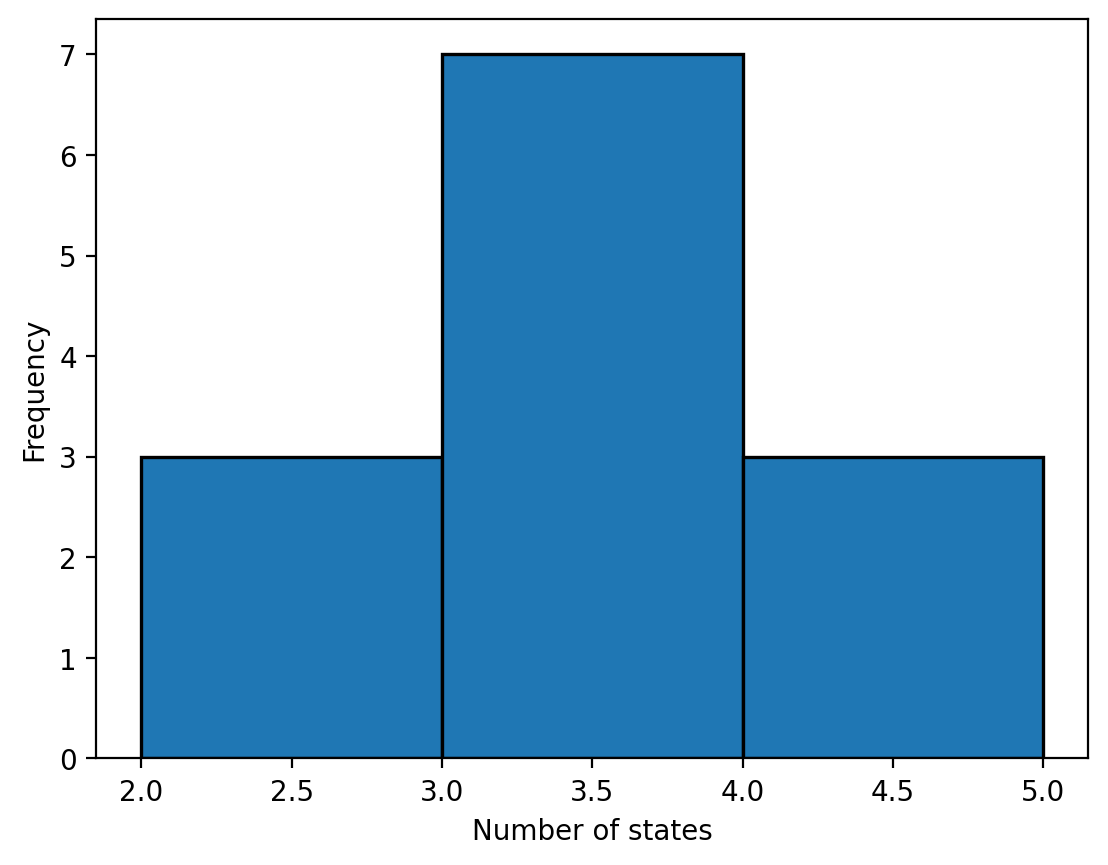

In [27]:
# create bins for histogram
bins = np.arange(2, 6, 1)

# create histogram
plt.hist(opt_states, bins=bins, edgecolor='black', linewidth=1.2)

# set labels
plt.xlabel('Number of states')
plt.ylabel('Frequency')

# show plot
plt.show()